# Anomaly Detection in R

# Mary Donovan Martello

## Part 6:  K Means Clusters:  Visualization

In [2]:
# Importing required libraries
library(dplyr)
library(caret)
library(ggplot2)
library(caTools)
library(ROSE)
library(smotefamily)
library(rpart)
library(rpart.plot)
library(psych)
library(ltm)
library(corrplot)
library(e1071)
library(data.table)
library(factoextra)
library(NbClust)
library(fpc)
library(cluster)

suppressMessages(library(dplyr))
suppressMessages(library(caTools))
suppressMessages(library(ROSE))
suppressMessages(library(smotefamily))
suppressMessages(library(rpart.plot))
suppressMessages(library(psych))
suppressMessages(library(ltm))
suppressMessages(library(corrplot))
suppressMessages(library(e1071))
suppressMessages(library(data.table))
suppressMessages(library(factoextra))
suppressMessages(library(NbClust))
suppressMessages(library(fpc))
suppressMessages(library(cluster))

In [3]:
#Loading the dataset
dfAll <- read.csv('creditFraud10.csv')

In [4]:
dim(dfAll)

[1] 28481    31

In [5]:
head(dfAll, 2)

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33209,0.1579738,-0.3135721,-0.8799915,-2.3710149,1.832820,3.3410355,-0.8045669,0.01251665,-0.9891706,...,0.674059981,-0.8824945,-0.26334793,0.9186489,1.0777848,-0.3662552,0.13243425,0.22821326,80.08,0
77276,1.2470640,-0.3239156,0.9178714,-0.7282708,-1.180023,-0.8173157,-0.5494987,-0.05259299,1.7699065,...,-0.008405836,0.2422148,-0.03969362,0.4188275,0.5116329,-0.6877417,0.09587039,0.03602943,1.00,0


### Drop Non-Normal Distribution Features

In [6]:
df <- dfAll[, c(3:24, 26:31)]
head(df, 2)

V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V20,V21,V22,V23,V25,V26,V27,V28,Amount,Class
-0.3135721,-0.8799915,-2.3710149,1.832820,3.3410355,-0.8045669,0.01251665,-0.9891706,-0.3395744,-0.05770153,...,0.1487577,0.674059981,-0.8824945,-0.26334793,1.0777848,-0.3662552,0.13243425,0.22821326,80.08,0
-0.3239156,0.9178714,-0.7282708,-1.180023,-0.8173157,-0.5494987,-0.05259299,1.7699065,-1.0898177,-0.38001273,...,-0.1039912,-0.008405836,0.2422148,-0.03969362,0.5116329,-0.6877417,0.09587039,0.03602943,1.00,0


**Create Subset of Features from Feature Selection**

In [7]:
dfSub <- dfAll[, c(5:5, 11:11, 13:13, 15:15, 18:18, 31:31)]
head(dfSub, 2)

V4,V10,V12,V14,V17,Class
-2.3710149,-0.3395744,-0.8130265,-1.1791100,0.5734176,0
-0.7282708,-1.0898177,0.9220560,-0.2163698,-0.1641099,0


### Split Data

**> Full Normal Dataset**

In [8]:
set.seed(102) 
sample = sample.split(df$Amount, SplitRatio = .80)
Train = subset(df, sample == TRUE)
Test  = subset(df, sample == FALSE)


In [9]:
# drop the target variable
XTrain <- Train[, c(1:27)]
yTrain <- subset(Train, select=c("Class"))

XTest <- Test[, c(1:27)]
yTest <- subset(Test, select=c("Class"))

**> Select Dataset**

In [10]:
set.seed(103) 
sample2 = sample.split(dfSub$V4, SplitRatio = .80)
TrainSub = subset(dfSub, sample == TRUE)
TestSub  = subset(dfSub, sample == FALSE)

# drop the target variable
XTrainSub <- TrainSub[, c(1:5)]
yTrainSub <- subset(TrainSub, select=c("Class"))

XTestSub <- TestSub[, c(1:5)]
yTestSub <- subset(TestSub, select=c("Class"))

### Modeling

**Select Number of Clusters with Elbow Method**

**> Select Subset**

In [ ]:
# find optimal number of clusters

Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1210950)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1210950)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1210950)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1210950)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1210950)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1210950)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1210950)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1210950)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1210950)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1210950)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1210950)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1210950)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1210950)"Warning message:
"Quick-TRANSfer stage

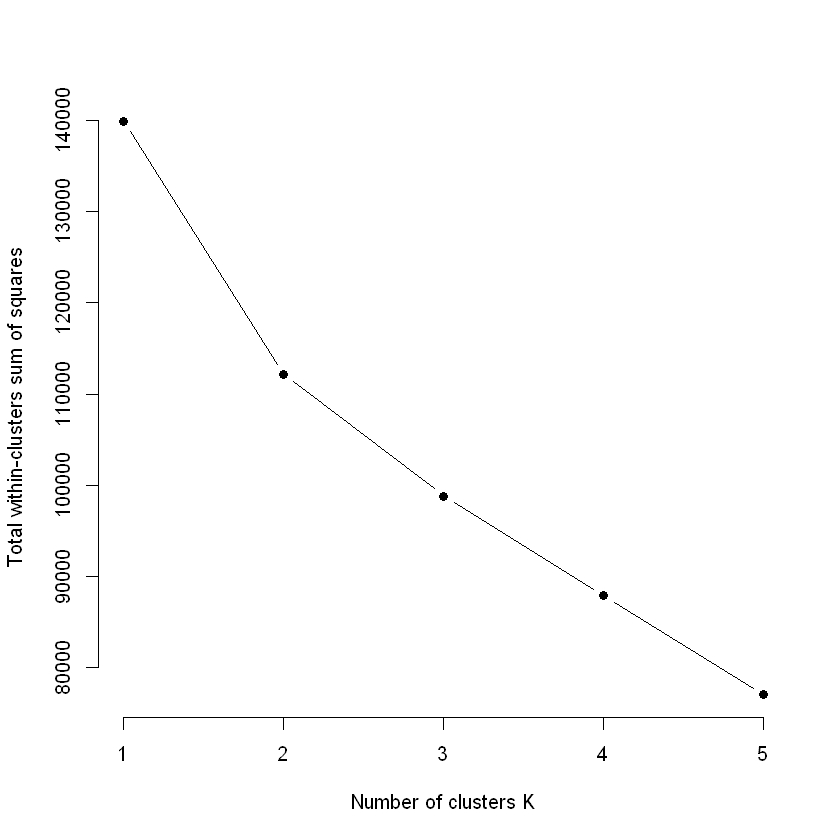

In [11]:
#Elbow Method for finding the optimal number of clusters
set.seed(234)
# Compute and plot wss (within sum of square) for k = 2 to k =5
k.max <- 5
data <- XTrainSub
# calculate percentage of variance explained by clusters (within-clusters sum of squares)
# Keep number of iter.max=15 to ensure the algorithm converges and 
# and keep nstart=50 to ensure that at least 50 random sets are chosen 
wss <- sapply(1:k.max, 
              function(k){kmeans(data, k, nstart=50,iter.max = 15 )$tot.withinss})
plot(1:k.max, wss,
     type="b", pch = 19, frame = FALSE, 
     xlab="Number of clusters K",
     ylab="Total within-clusters sum of squares")

**> Full Normal Dataset**

Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1210950)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1210950)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1210950)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1210950)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1210950)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1210950)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1210950)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1210950)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1210950)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1210950)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1210950)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1210950)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1210950)"Warning message:
"Quick-TRANSfer stage

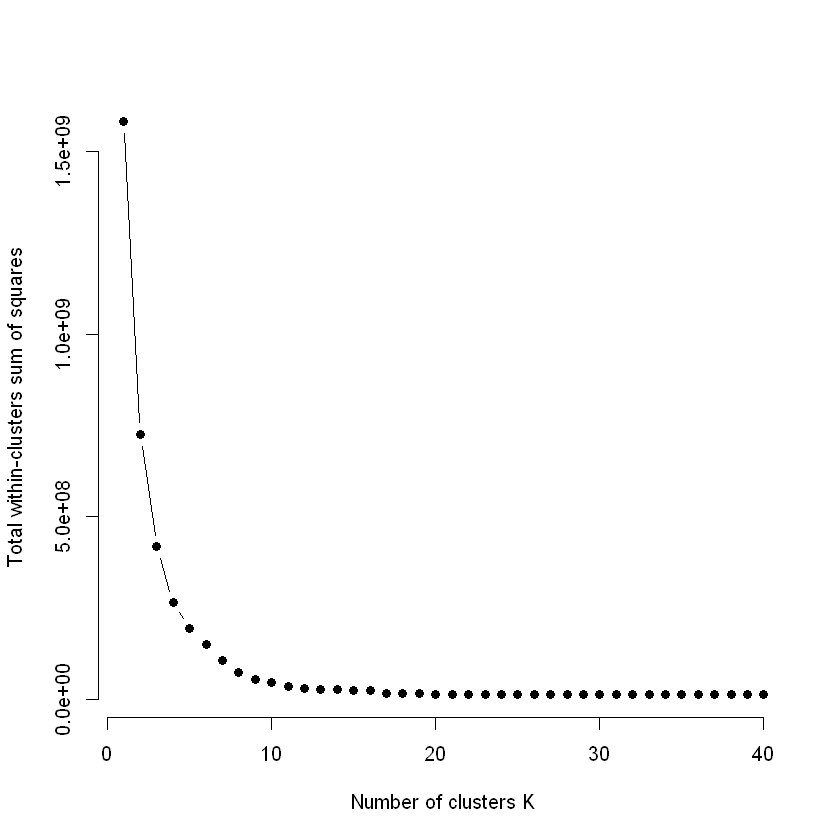

In [12]:
#Elbow Method for finding the optimal number of clusters
set.seed(234)
# Compute and plot wss (within sum of square) for k = 2 to k = 40.
k.max <- 40
data <- XTrain
# calculate percentage of variance explained by clusters (within-clusters sum of squares)
# Keep number of iter.max=40 to ensure the algorithm converges and 
# and keep nstart=50 to ensure that at least 50 random sets are chosen 
wss <- sapply(1:k.max, 
              function(k){kmeans(data, k, nstart=50, iter.max = 40)$tot.withinss})
plot(1:k.max, wss,
     type="b", pch = 19, frame = FALSE, 
     xlab="Number of clusters K",
     ylab="Total within-clusters sum of squares")

In [13]:
print(wss)

 [1] 1582288061  725590653  417476433  265140722  194074395  149507461
 [7]  107334846   74055611   55839047   47818392   35455822   31324720
[13]   28188578   26193586   24455512   23770139   17380320   15840933
[19]   15308767   15009806   14549364   13949248   13763302   13635018
[25]   13569333   13552618   13544411   13479098   13524073   13455370
[31]   13337973   13325487   13304370   13298761   13265046   13254382
[37]   13246546   13243382   13225662   13231143


## Visualization of Clusters

**> Select Subset**

In [14]:
# Compute k-means with k = 2
set.seed(345)
resultSub <- kmeans(XTrainSub, 2, iter.max = 20, nstart = 50)

In [15]:
head(resultSub$cluster)

1 2 3 4 6 7 
1 1 1 2 2 1

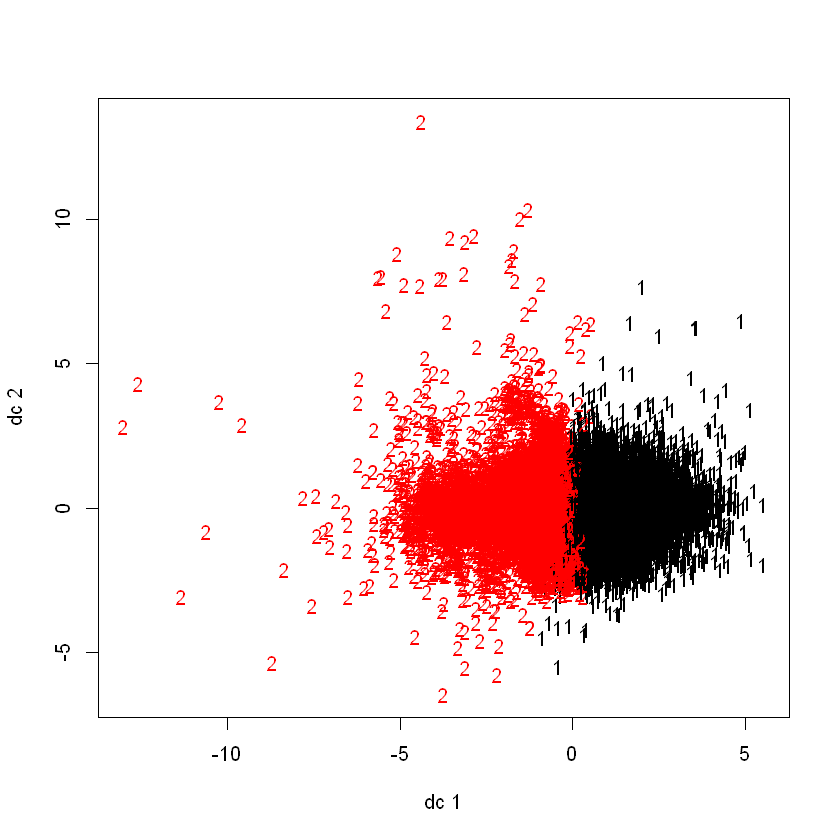

In [42]:
plotcluster(XTrainSub, resultSub$cluster, method = 'dc')

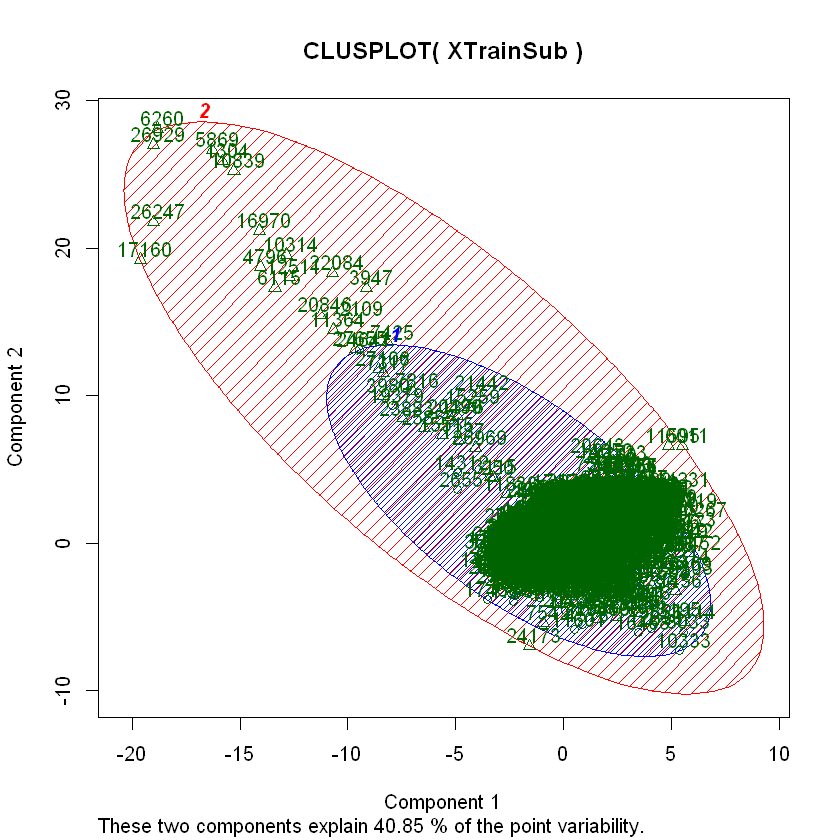

In [18]:
# Cluster Plot against 1st 2 principal components
library(cluster)
clusplot(XTrainSub, resultSub$cluster, color=TRUE, shade=TRUE, labels=2, lines=0)

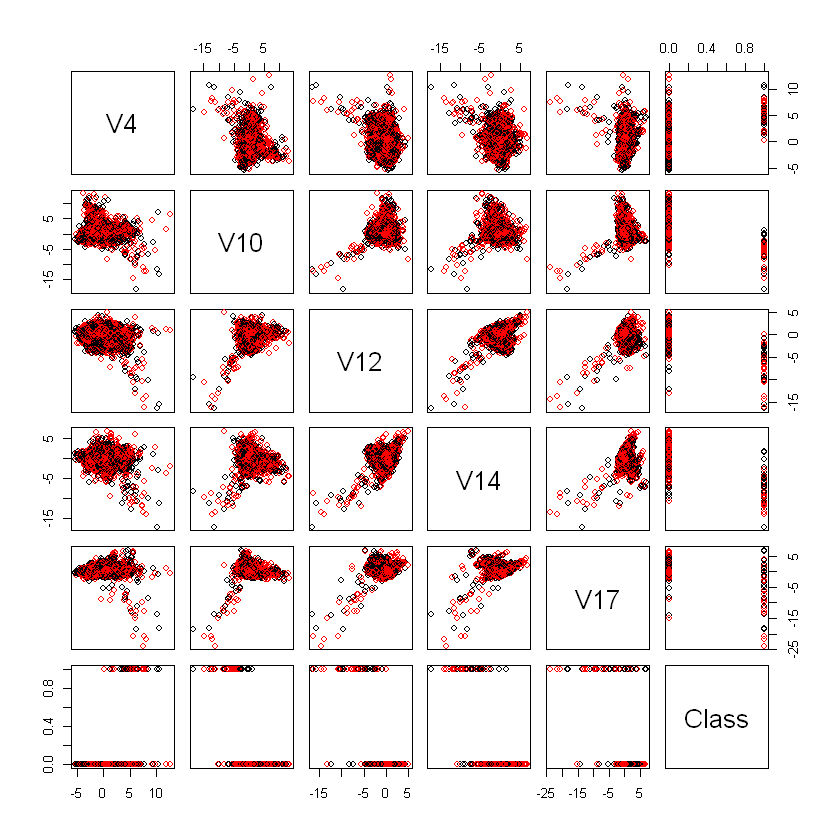

In [19]:
with(XTrainSub, pairs(dfSub, col=c(1:4)[resultSub$cluster]))

# below returns the same
#plot(dfSub,col=resultSub$cluster)
#points(resultSub$center,col=1:2,pch=4,cex=1)

In [21]:
# Add the cluster classifications to the original data
clustDf <- cbind(XTrainSub, cluster = resultSub$cluster)
head(clustDf, 2)

V4,V10,V12,V14,V17,cluster
-2.3710149,-0.3395744,-0.8130265,-1.1791100,0.5734176,1
-0.7282708,-1.0898177,0.9220560,-0.2163698,-0.1641099,1


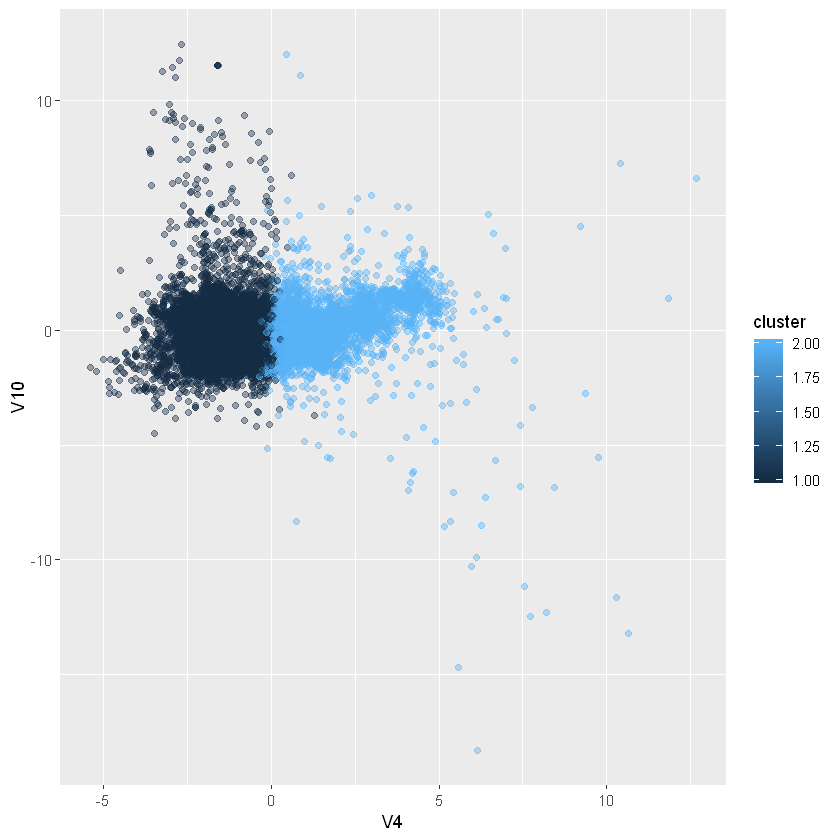

In [22]:
# scatter plot of two significant features, colored by the clusters feature
ggplot(clustDf, aes(x = V4, y = V10, color=cluster)) + geom_point(alpha = 0.4) + 
    labs(x = "V4", y = "V10")

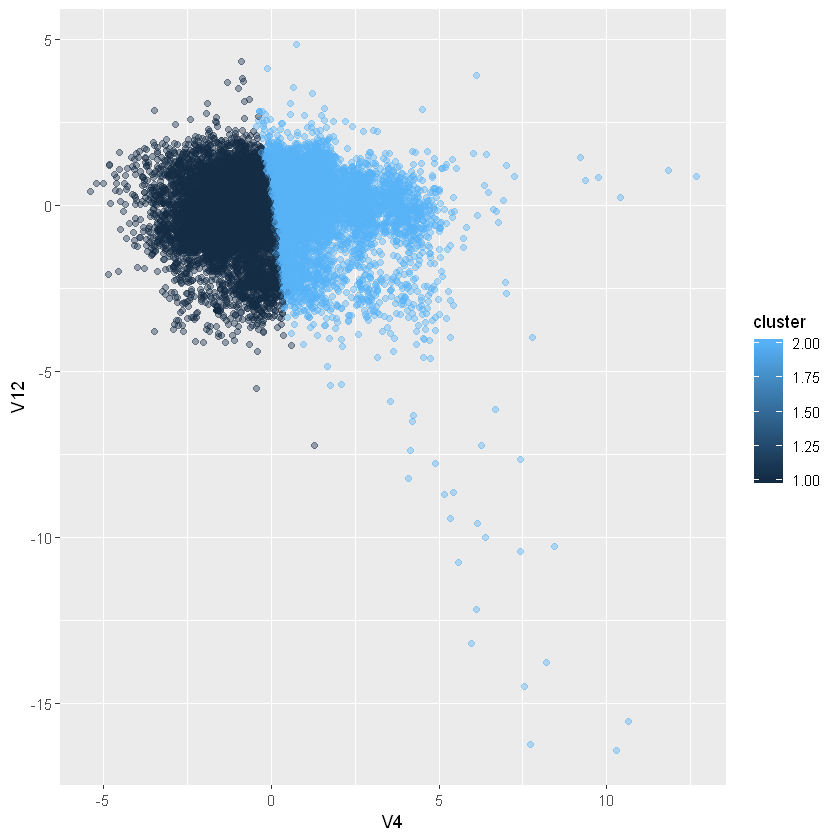

In [43]:
# scatter plot of two significant features, colored by the clusters feature
ggplot(clustDf, aes(x = V4, y = V12, color=cluster)) + geom_point(alpha = 0.4) + 
    labs(x = "V4", y = "V12")

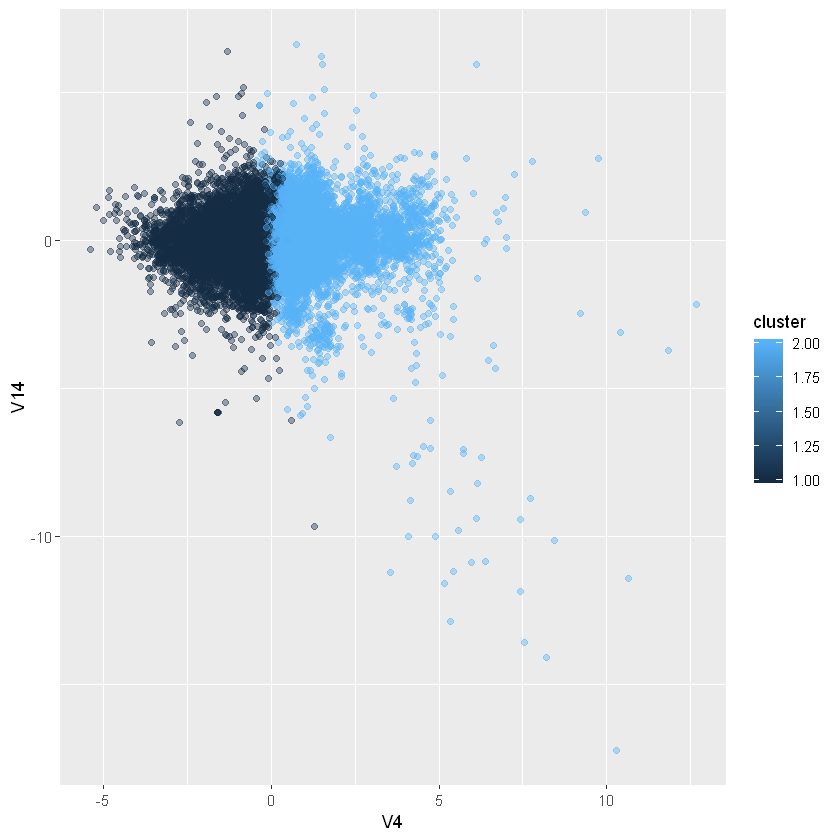

In [24]:
# scatter plot of two significant features, colored by the clusters feature
ggplot(clustDf, aes(x = V4, y = V14, color=cluster)) + geom_point(alpha = 0.4) + 
    labs(x = "V4", y = "V14")

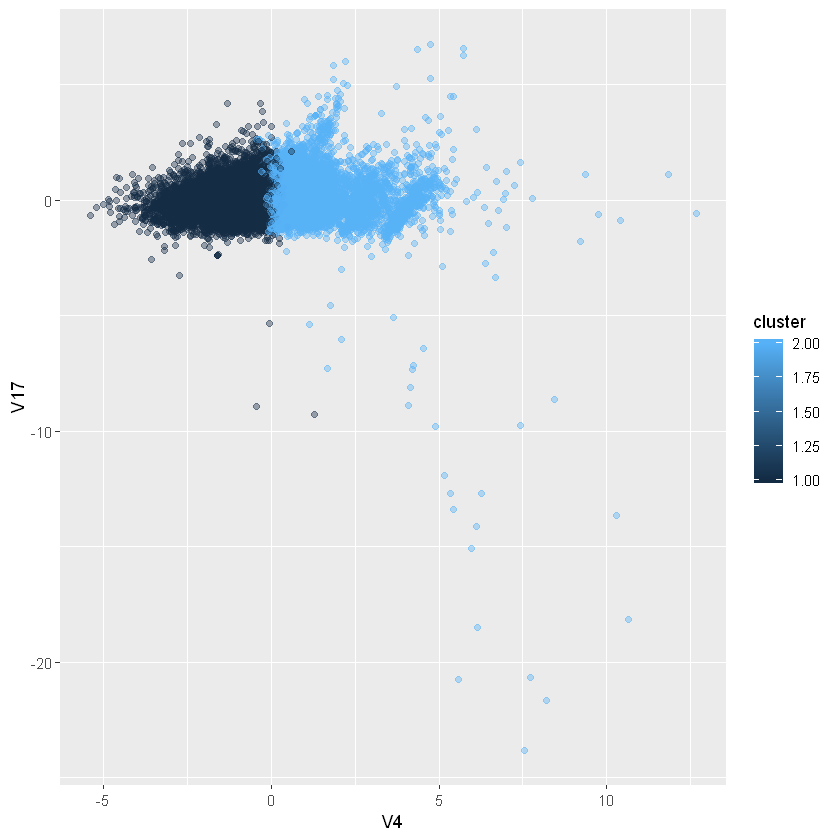

In [25]:
# scatter plot of two significant features, colored by the clusters feature
ggplot(clustDf, aes(x = V4, y = V17, color=cluster)) + geom_point(alpha = 0.4) + 
    labs(x = "V4", y = "V17")

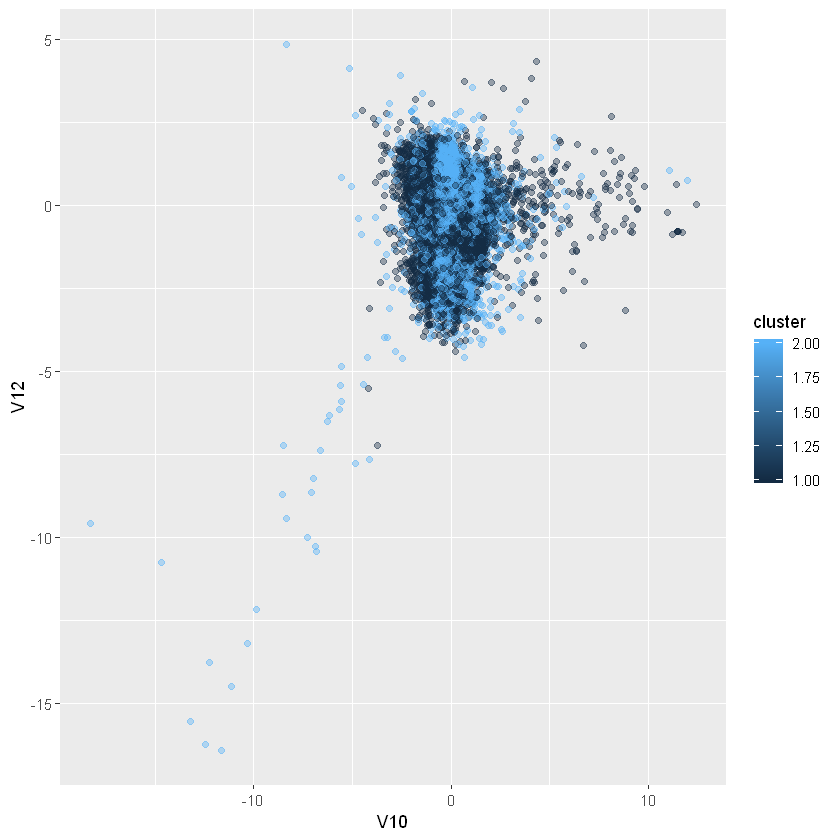

In [26]:
# scatter plot of two significant features, colored by the clusters feature
ggplot(clustDf, aes(x = V10, y = V12, color=cluster)) + geom_point(alpha = 0.4) + 
    labs(x = "V10", y = "V12")

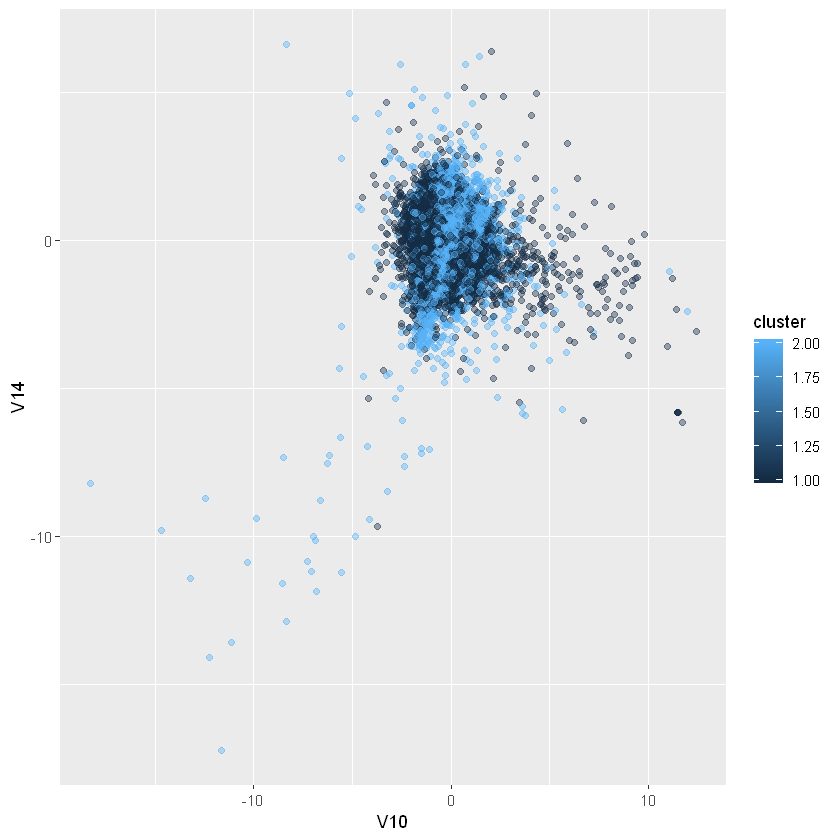

In [27]:
# scatter plot of two significant features, colored by the clusters feature
ggplot(clustDf, aes(x = V10, y = V14, color=cluster)) + geom_point(alpha = 0.4) + 
    labs(x = "V10", y = "V14")

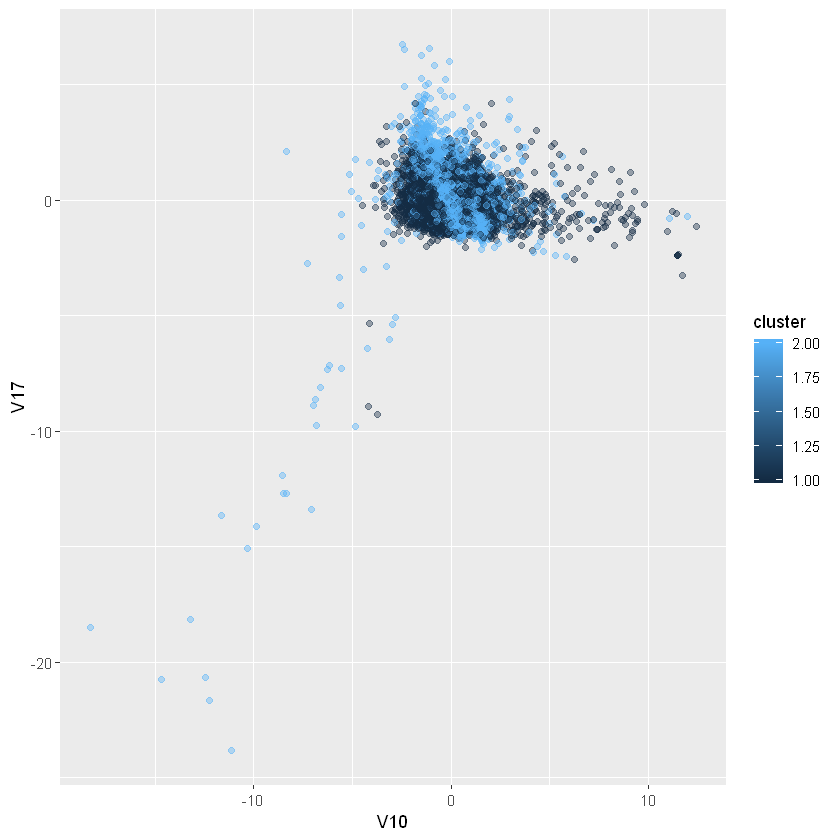

In [28]:
# scatter plot of two significant features, colored by the clusters feature
ggplot(clustDf, aes(x = V10, y = V17, color=cluster)) + geom_point(alpha = 0.4) + 
    labs(x = "V10", y = "V17")

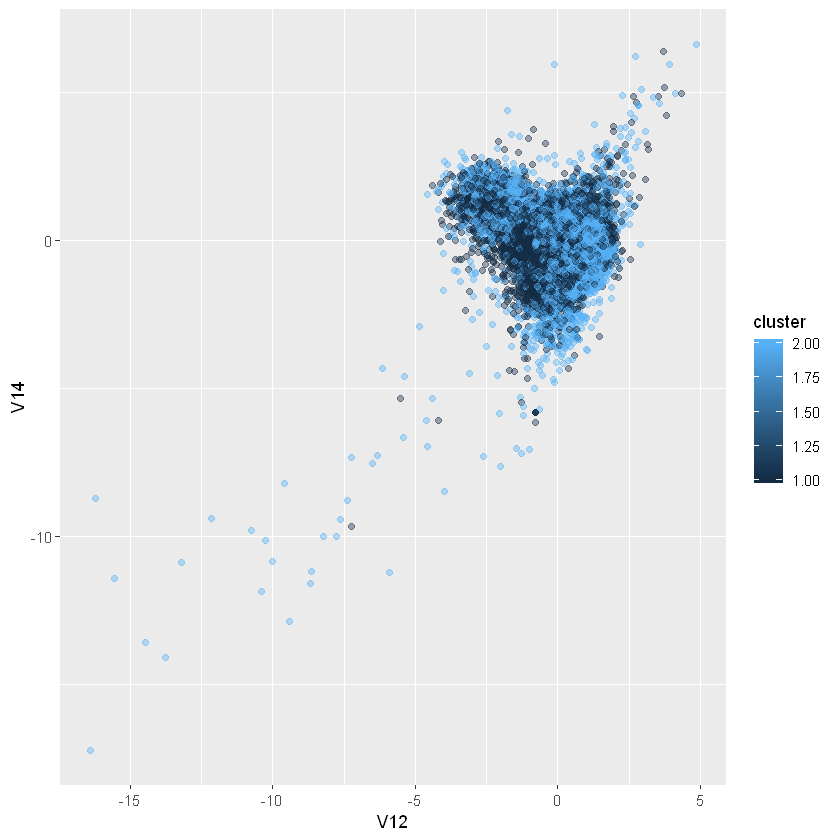

In [29]:
# scatter plot of two significant features, colored by the clusters feature
ggplot(clustDf, aes(x = V12, y = V14, color=cluster)) + geom_point(alpha = 0.4) + 
    labs(x = "V12", y = "V14")

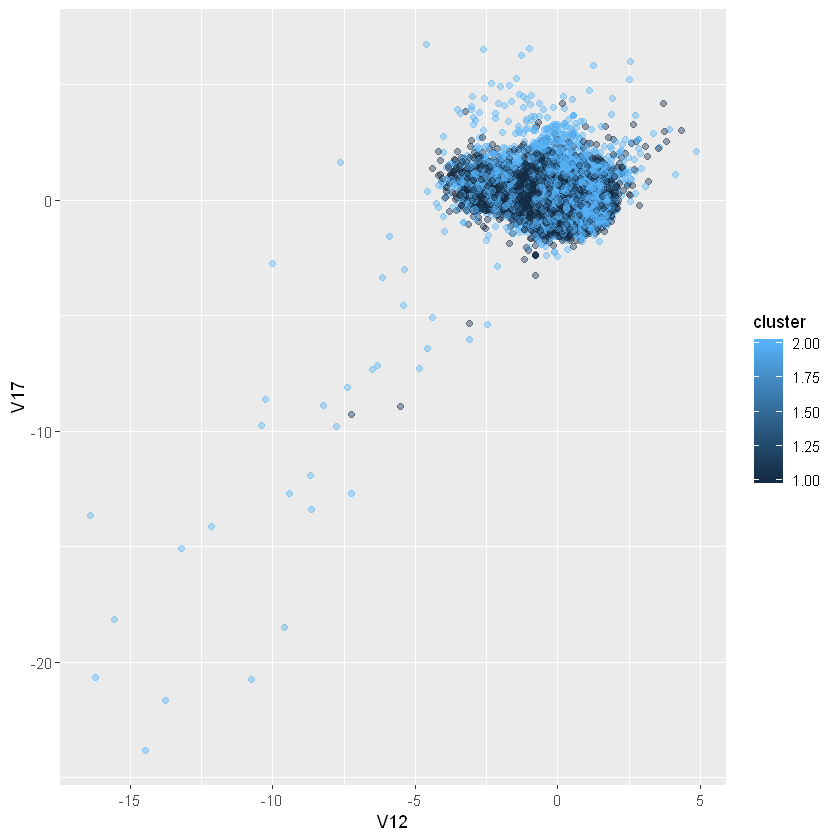

In [30]:
# scatter plot of two significant features, colored by the clusters feature
ggplot(clustDf, aes(x = V12, y = V17, color=cluster)) + geom_point(alpha = 0.4) + 
    labs(x = "V12", y = "V17")

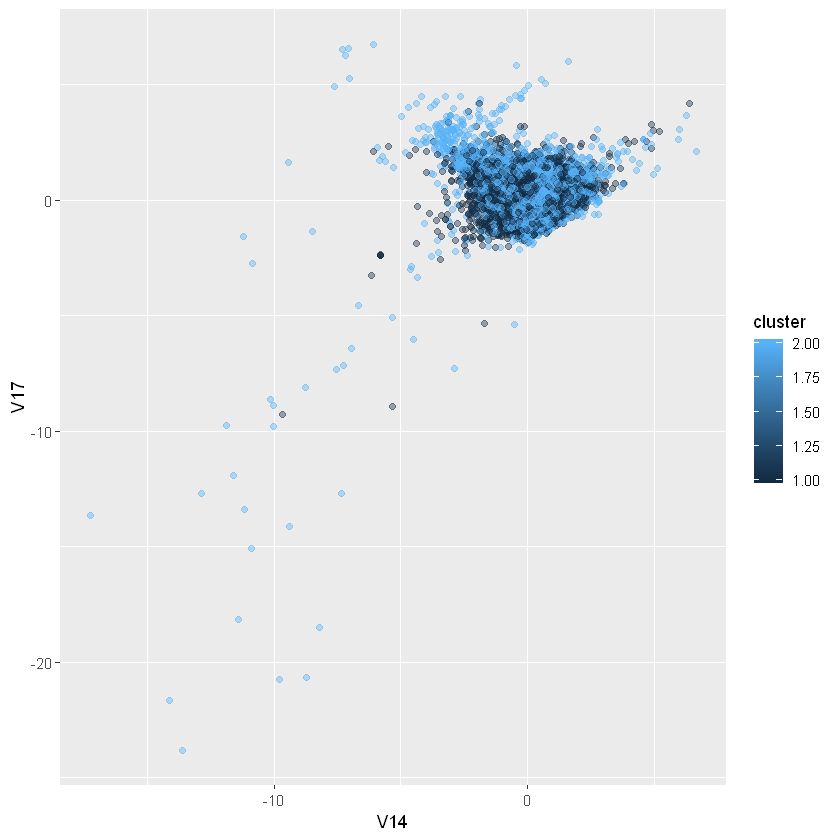

In [31]:
# scatter plot of two significant features, colored by the clusters feature
ggplot(clustDf, aes(x = V14, y = V17, color=cluster)) + geom_point(alpha = 0.4) + 
    labs(x = "V14", y = "V17")

**> Full Normal Dataset**

In [35]:
# Compute k-means with k = 10
set.seed(345)
result10 <- kmeans(XTrain, 10, iter.max = 20, nstart = 50)
# Print the results
#print(result)

In [33]:
# Cluster size
result10$size

[1]     1    17  1089  4936   302 14901   558  2234   138    43

In [36]:
head(result10$cluster)

1 2 3 4 6 7 
4 6 6 6 4 4

In [37]:
kmeans10table <- data.frame(result10$size, result10$centers)
kmeans10df <- data.frame(XTrain,  cluster = result10$cluster)
head(kmeans10df, 2)

V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V20,V21,V22,V23,V25,V26,V27,V28,Amount,cluster
-0.3135721,-0.8799915,-2.3710149,1.832820,3.3410355,-0.8045669,0.01251665,-0.9891706,-0.3395744,-0.05770153,...,0.1487577,0.674059981,-0.8824945,-0.26334793,1.0777848,-0.3662552,0.13243425,0.22821326,80.08,4
-0.3239156,0.9178714,-0.7282708,-1.180023,-0.8173157,-0.5494987,-0.05259299,1.7699065,-1.0898177,-0.38001273,...,-0.1039912,-0.008405836,0.2422148,-0.03969362,0.5116329,-0.6877417,0.09587039,0.03602943,1.00,6


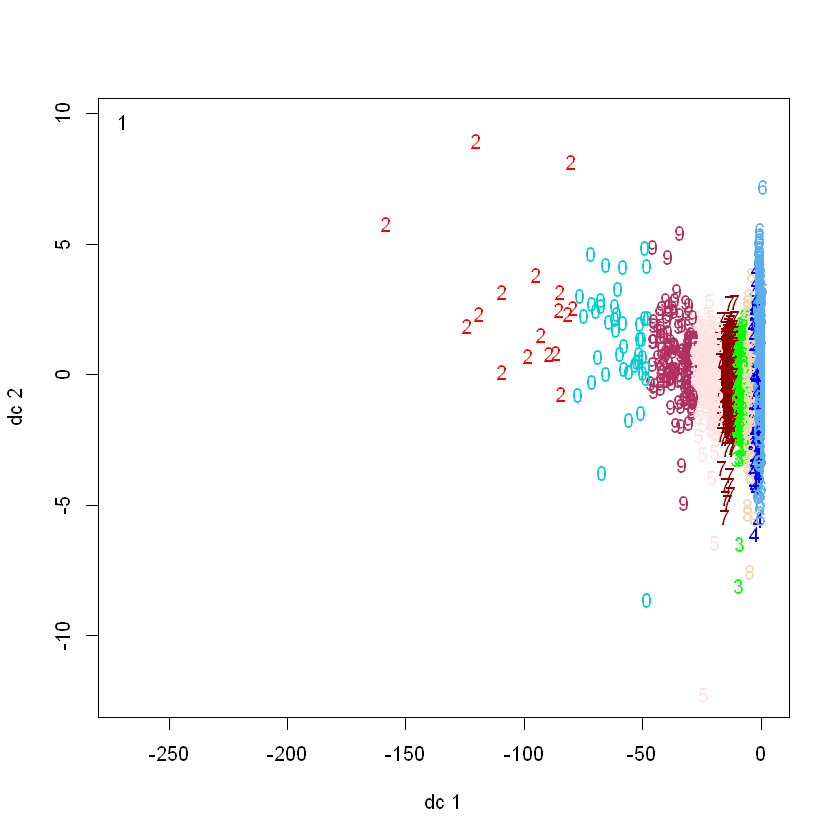

In [38]:
plotcluster(XTrain, result10$cluster)

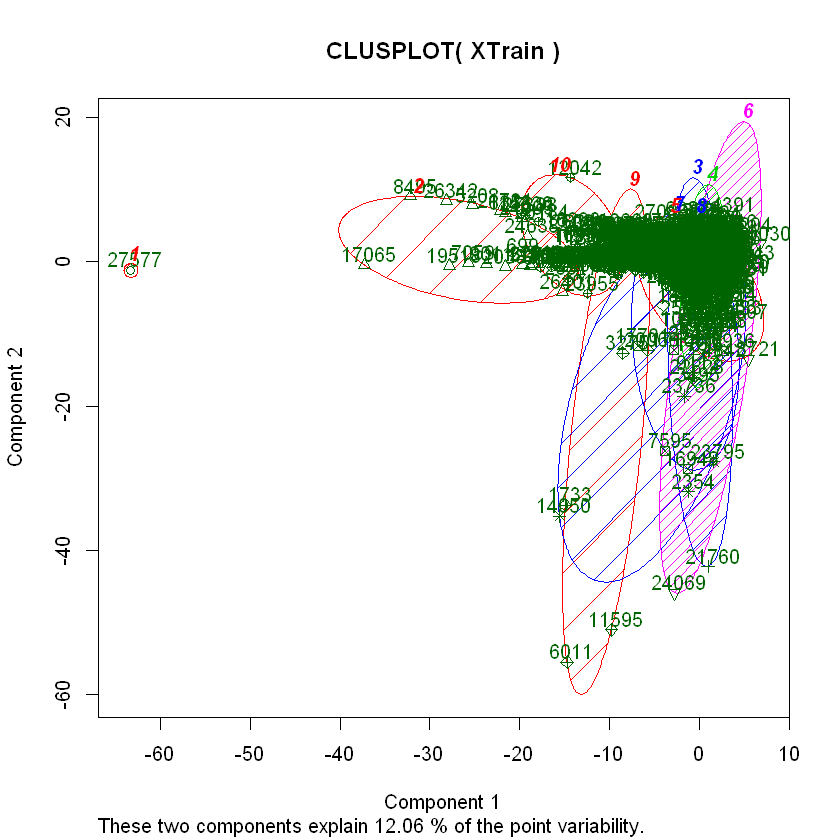

In [39]:

# Cluster Plot against 1st 2 principal components 
clusplot(XTrain, result10$cluster, color=TRUE, shade=TRUE, labels=2, lines=0)

### DBSCAN

**This was run in RStudio as it would not compute in this notebook.**

In [ ]:
# Compute with eps = .15
set.seed(567)
resultSub <- dbscan(Xsub, eps = .15, MinPts = 5)
# Plot DBSCAN results
plot(resultSub, Xsub, main = "DBSCAN", frame = FALSE)